KeyboardInterrupt: 

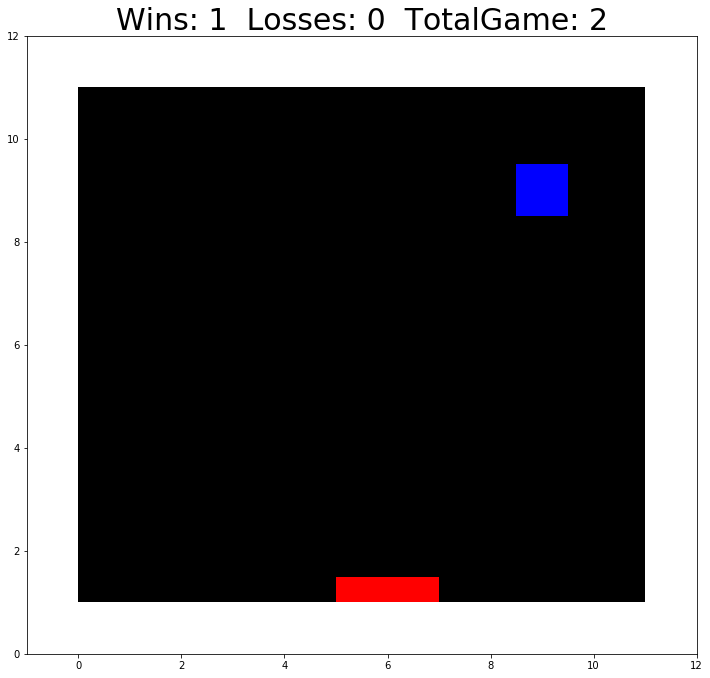

In [1]:
# -*- coding: utf-8 -*-

%matplotlib
%matplotlib inline

from train import *
from IPython import display
import matplotlib.patches as patches
import pylab as pl
import time
import tensorflow as tf
import os

gridSize = 10
maxGames = 100
env = CatchEnvironment(gridSize)
winCount = 0
loseCount = 0
numberOfGames = 0

ground = 1
plot = pl.figure(figsize=(12,12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1, 12])
axis.set_ylim([0, 12])

saver = tf.train.Saver()

def drawState(fruitRow, fruitColumn, basket, gridSize):
  fruitX = fruitColumn 
  fruitY = (gridSize - fruitRow + 1)
  statusTitle = "Wins: " + str(winCount) + "  Losses: " + str(loseCount) + "  TotalGame: " + str(numberOfGames)
  axis.set_title(statusTitle, fontsize=30)
  for p in [
    patches.Rectangle(
        ((ground - 1), (ground)), 11, 10,
        facecolor="#000000"
    ),
    patches.Rectangle(
        (basket - 1, ground), 2, 0.5,
        facecolor="#FF0000"
    ),
    patches.Rectangle(
        (fruitX - 0.5, fruitY - 0.5), 1, 1,
        facecolor="#0000FF"       # Blue
    ),   
    ]:
      axis.add_patch(p)
  display.clear_output(wait=True)
  display.display(pl.gcf())


with tf.Session() as sess:    
  saver.restore(sess, os.getcwd()+"/model.ckpt")
  print('파라미터를 불러왔습니다!')

  while (numberOfGames < maxGames):
    numberOfGames = numberOfGames + 1
     
    isGameOver = False
    fruitRow, fruitColumn, basket = env.reset()
    currentState = env.observe()
    drawState(fruitRow, fruitColumn, basket, gridSize)

    while (isGameOver != True):
      q = sess.run(y_pred, feed_dict={x: currentState})
      action = q.argmax()

      nextState, reward, gameOver, stateInfo = env.act(action)    
      fruitRow = stateInfo[0]
      fruitColumn = stateInfo[1]
      basket = stateInfo[2]
     
      if (reward == 1):
        winCount = winCount + 1
      elif (reward == -1):
        loseCount = loseCount + 1

      currentState = nextState
      isGameOver = gameOver
      drawState(fruitRow, fruitColumn, basket, gridSize)
    
      time.sleep(0.003)

display.clear_output(wait=True)
